In [1]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import shutil

# Beat Sounds

In [4]:
# Define paths
multi_class_path = "Dataset"  # Path to multi-class dataset
binary_class_path = "sounds"  # New binary dataset path

In [5]:
# Define category mapping
other_classes = ["Other"]  
heart_classes = ["Normal", "MS", "MR", "MD", "AS", "AR"]  

In [6]:
# Create binary classification folders
os.makedirs(os.path.join(binary_class_path, "OtherBeat"), exist_ok=True)
os.makedirs(os.path.join(binary_class_path, "HeartBeat"), exist_ok=True)

In [88]:
# Function to copy files to binary folders
def copy_files(class_list, binary_label):
    for class_name in class_list:
        source_folder = os.path.join(multi_class_path, class_name)
        destination_folder = os.path.join(binary_class_path, binary_label)
        
        if os.path.exists(source_folder):
            for file_name in os.listdir(source_folder):
                src_path = os.path.join(source_folder, file_name)
                dst_path = os.path.join(destination_folder, file_name)
                shutil.copy(src_path, dst_path)
            print(f"Copied {class_name} -> {binary_label}")

In [9]:
copy_files(other_classes, "OtherBeat")

Copied Other -> OtherBeat


In [10]:
copy_files(heart_classes, "HeartBeat")

Copied Normal -> HeartBeat
Copied MS -> HeartBeat
Copied MR -> HeartBeat
Copied MD -> HeartBeat
Copied AS -> HeartBeat
Copied AR -> HeartBeat


# Heart-Beat Sounds

In [11]:
# Define paths
multi_class_path = "Dataset"  # Path to multi-class dataset
binary_class_path = "HeartBeats"  # New binary dataset path

In [12]:
# Define category mapping
normal_classes = ["Normal"]  # Classes considered "Normal"
abnormal_classes = ["MS", "MR", "MD", "AS", "AR"]  # Classes considered "Abnormal"

In [13]:
# Create binary classification folders
os.makedirs(os.path.join(binary_class_path, "Normal"), exist_ok=True)
os.makedirs(os.path.join(binary_class_path, "Abnormal"), exist_ok=True)

In [14]:
copy_files(normal_classes, "Normal")

Copied Normal -> Normal


In [15]:
copy_files(abnormal_classes, "Abnormal")

Copied MS -> Abnormal
Copied MR -> Abnormal
Copied MD -> Abnormal
Copied AS -> Abnormal
Copied AR -> Abnormal


# Multi-Heart Beat Sounds

In [90]:
source_folders = {
    "Folder1": "Dataset/AR",  
    "Folder2": "Dataset/AS",
    "Folder3": "Dataset/MD",
    "Folder4": "Dataset/MR",
    "Folder5": "Dataset/MS",
}

In [91]:
destination_folders = {
    "NewFolder1": "MultiHeartBeats/AR",
    "NewFolder2": "MultiHeartBeats/AS",
    "NewFolder3": "MultiHeartBeats/MD",
    "NewFolder4": "MultiHeartBeats/MR",
    "NewFolder5": "MultiHeartBeats/MS",
}

In [92]:
# Ensure destination folders exist
for dest in destination_folders.values():
    os.makedirs(dest, exist_ok=True)

In [93]:
# Function to copy files from source to destination
def copy_folder(src, dst):
    if os.path.exists(src):
        for file_name in os.listdir(src):
            src_path = os.path.join(src, file_name)
            dst_path = os.path.join(dst, file_name)
            shutil.copy(src_path, dst_path)
        print(f"Copied files from {src} to {dst}")

In [94]:
# Copy files from Folder1 → NewFolder1
copy_folder(source_folders["Folder1"], destination_folders["NewFolder1"])
copy_folder(source_folders["Folder2"], destination_folders["NewFolder2"])
copy_folder(source_folders["Folder3"], destination_folders["NewFolder3"])
copy_folder(source_folders["Folder4"], destination_folders["NewFolder4"])
copy_folder(source_folders["Folder5"], destination_folders["NewFolder5"])

Copied files from Dataset/AR to MultiHeartBeats/AR
Copied files from Dataset/AS to MultiHeartBeats/AS
Copied files from Dataset/MD to MultiHeartBeats/MD
Copied files from Dataset/MR to MultiHeartBeats/MR
Copied files from Dataset/MS to MultiHeartBeats/MS


# Classification

# Beat Sounds

In [126]:
import librosa
import os
import joblib

In [127]:
# Feature extraction function
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)  # Load audio
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y).T, axis=0)
    rms = np.mean(librosa.feature.rms(y=y).T, axis=0)

    return np.hstack([mfccs, chroma, mel, zcr, rms])

In [128]:
# Load dataset and extract features
dataset_path = "sounds"

In [129]:
labels = []
features = []

In [130]:
for label in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, label)
    if os.path.isdir(class_path):
        for file in os.listdir(class_path):
            file_path = os.path.join(class_path, file)
            feature_vector = extract_features(file_path)
            features.append(feature_vector)
            labels.append(label)

In [131]:
# Convert to DataFrame
df = pd.DataFrame(features)
df['label'] = labels

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4753 entries, 0 to 4752
Columns: 156 entries, 0 to label
dtypes: float64(155), object(1)
memory usage: 5.7+ MB


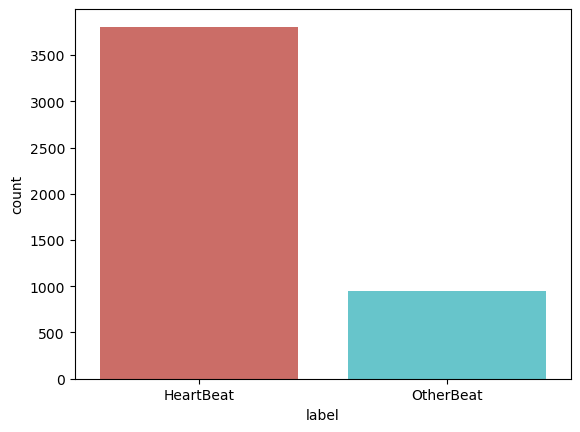

In [133]:
sns.countplot(x='label',data=df, palette='hls')
plt.show()
#plt.savefig('count_plot') mal: the nodule malignancy, 0: benign, 1: malignant

In [134]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [135]:
X = df.drop(columns=['label']).values
y = df['label'].values

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [22]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score

In [23]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# SVM

In [24]:
from sklearn import svm
svc = svm.SVC(probability=True, C=1.0, kernel = "rbf", gamma=0.1)
svc.fit(X_train, y_train)

y_pred    = svc.predict(X_valid)

svc_acc = accuracy_score(y_pred, y_valid)
svc_prec = precision_score(y_pred, y_valid,average='weighted')
svc_f1 = f1_score(y_pred, y_valid,average='weighted')
svc_rec = recall_score(y_pred, y_valid,average='weighted')

In [26]:
storeResults('SVM',svc_acc,svc_prec,svc_rec,svc_f1)

# XGBoost

In [27]:
from xgboost import XGBClassifier
bo_xgb = XGBClassifier()

bo_xgb.fit(X_train, y_train)

y_pred    = bo_xgb.predict(X_valid)

xgb_acc = accuracy_score(y_pred, y_valid)
xgb_prec = precision_score(y_pred, y_valid,average='weighted')
xgb_f1 = f1_score(y_pred, y_valid,average='weighted')
xgb_rec = recall_score(y_pred, y_valid,average='weighted')

In [28]:
storeResults('XGBoost',xgb_acc,xgb_prec,xgb_rec,xgb_f1)

# MLP

In [29]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')
mlp.fit(X_train, y_train)

y_pred    = mlp.predict(X_valid)

mlp_acc = accuracy_score(y_pred, y_valid)
mlp_prec = precision_score(y_pred, y_valid,average='weighted')
mlp_rec = recall_score(y_pred, y_valid,average='weighted')
mlp_f1 = f1_score(y_pred, y_valid,average='weighted')

In [30]:
storeResults('MLP',mlp_acc,mlp_prec,mlp_rec,mlp_f1)

# LightGBM

In [32]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_valid)

lgb_acc = accuracy_score(y_pred, y_valid)
lgb_prec = precision_score(y_pred, y_valid,average='weighted')
lgb_f1 = f1_score(y_pred, y_valid,average='weighted')
lgb_rec = recall_score(y_pred, y_valid,average='weighted')

[LightGBM] [Info] Number of positive: 764, number of negative: 3038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39525
[LightGBM] [Info] Number of data points in the train set: 3802, number of used features: 155
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200947 -> initscore=-1.380387
[LightGBM] [Info] Start training from score -1.380387
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [33]:
storeResults('LightGBM',lgb_acc,lgb_prec,lgb_rec,lgb_f1)

# Voting Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [137]:
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)

brf =  BaggingClassifier(MLPClassifier(random_state=1, max_iter=300))

ext = VotingClassifier(estimators=[('BoostDT', bdt),('BaggingMLP', brf)], voting='soft')

ext.fit(X_train, y_train)

y_pred = ext.predict(X_valid)

ext_acc = accuracy_score(y_pred, y_valid)
ext_prec = precision_score(y_pred, y_valid,average='weighted')
ext_rec = recall_score(y_pred, y_valid,average='weighted')
ext_f1 = f1_score(y_pred, y_valid,average='weighted')

In [37]:
storeResults('Voting Classifier',ext_acc,ext_prec,ext_rec,ext_f1)

# Comparison

In [38]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score 
                      }) 

In [39]:
result

,ML Model,Accuracy,Precision,Recall,F1_score
0,SVM,0.844,0.971,0.844,0.891
1,XGBoost,0.998,0.998,0.998,0.998
2,MLP,0.993,0.993,0.993,0.993
3,LightGBM,0.997,0.997,0.997,0.997
4,Voting Classifier,0.999,0.999,0.999,0.999


# Modelling

In [140]:
import joblib
filename = 'models/model_beats.sav'
joblib.dump(ext, filename)

['models/model_beats.sav']

In [141]:
joblib.dump(encoder, "models/beats_encoder.pkl")

['models/beats_encoder.pkl']

# Graph

In [43]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

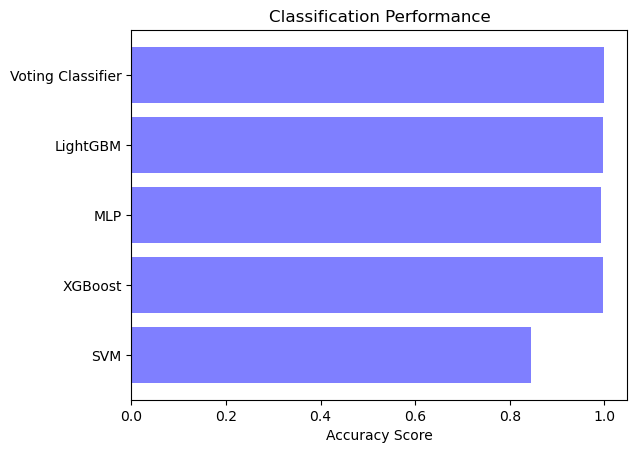

In [44]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

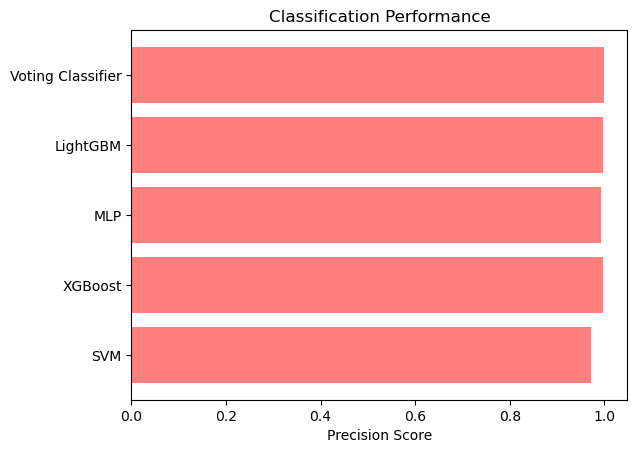

In [45]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

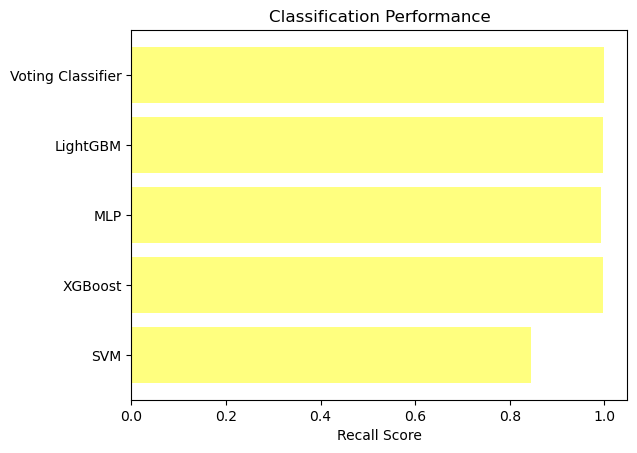

In [46]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

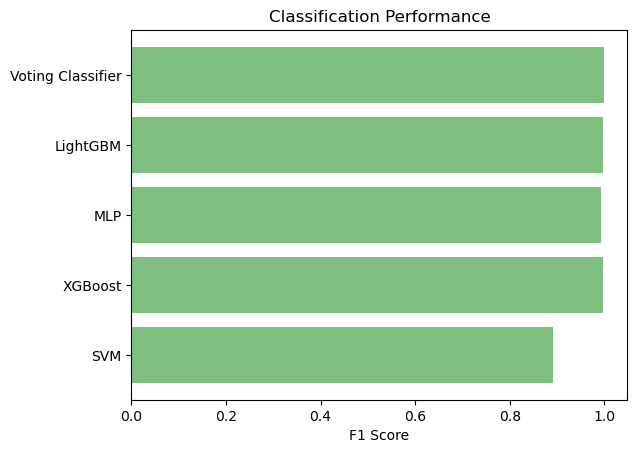

In [47]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# HeartBeats

In [48]:
# Feature extraction function
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)  # Load audio
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y).T, axis=0)
    rms = np.mean(librosa.feature.rms(y=y).T, axis=0)

    return np.hstack([mfccs, chroma, mel, zcr, rms])

In [49]:
# Load dataset and extract features
dataset_path = "HeartBeats"

In [50]:
labels = []
features = []

In [51]:
for label in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, label)
    if os.path.isdir(class_path):
        for file in os.listdir(class_path):
            file_path = os.path.join(class_path, file)
            feature_vector = extract_features(file_path)
            features.append(feature_vector)
            labels.append(label)

In [52]:
# Convert to DataFrame
df = pd.DataFrame(features)
df['label'] = labels

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3807 entries, 0 to 3806
Columns: 156 entries, 0 to label
dtypes: float64(155), object(1)
memory usage: 4.5+ MB


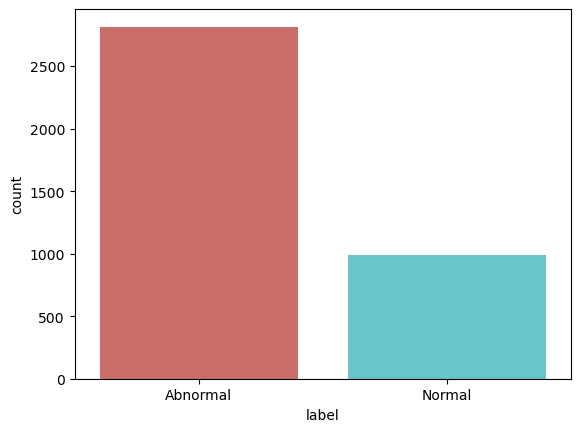

In [54]:
sns.countplot(x='label',data=df, palette='hls')
plt.show()
#plt.savefig('count_plot') mal: the nodule malignancy, 0: benign, 1: malignant

In [55]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [56]:
X = df.drop(columns=['label']).values
y = df['label'].values

In [57]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [58]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# SVM

In [59]:
svc = svm.SVC(probability=True, C=1.0, kernel = "rbf", gamma=0.1)
svc.fit(X_train, y_train)

y_pred    = svc.predict(X_valid)

svc_acc = accuracy_score(y_pred, y_valid)
svc_prec = precision_score(y_pred, y_valid,average='weighted')
svc_f1 = f1_score(y_pred, y_valid,average='weighted')
svc_rec = recall_score(y_pred, y_valid,average='weighted')

In [60]:
storeResults('SVM',svc_acc,svc_prec,svc_rec,svc_f1)

# XGBoost

In [61]:
bo_xgb = XGBClassifier()

bo_xgb.fit(X_train, y_train)

y_pred    = bo_xgb.predict(X_valid)

xgb_acc = accuracy_score(y_pred, y_valid)
xgb_prec = precision_score(y_pred, y_valid,average='weighted')
xgb_f1 = f1_score(y_pred, y_valid,average='weighted')
xgb_rec = recall_score(y_pred, y_valid,average='weighted')

In [62]:
storeResults('XGBoost',xgb_acc,xgb_prec,xgb_rec,xgb_f1)

# MLP

In [63]:
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')
mlp.fit(X_train, y_train)

y_pred    = mlp.predict(X_valid)

mlp_acc = accuracy_score(y_pred, y_valid)
mlp_prec = precision_score(y_pred, y_valid,average='weighted')
mlp_rec = recall_score(y_pred, y_valid,average='weighted')
mlp_f1 = f1_score(y_pred, y_valid,average='weighted')

In [64]:
storeResults('MLP',mlp_acc,mlp_prec,mlp_rec,mlp_f1)

# LightGBM

In [65]:
clf = lgb.LGBMClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_valid)

lgb_acc = accuracy_score(y_pred, y_valid)
lgb_prec = precision_score(y_pred, y_valid,average='weighted')
lgb_f1 = f1_score(y_pred, y_valid,average='weighted')
lgb_rec = recall_score(y_pred, y_valid,average='weighted')

[LightGBM] [Info] Number of positive: 817, number of negative: 2228
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39525
[LightGBM] [Info] Number of data points in the train set: 3045, number of used features: 155
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.268309 -> initscore=-1.003221
[LightGBM] [Info] Start training from score -1.003221


In [66]:
storeResults('LightGBM',lgb_acc,lgb_prec,lgb_rec,lgb_f1)

# Voting Classifier

In [67]:
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)

brf =  BaggingClassifier(MLPClassifier(random_state=1, max_iter=300))

ext = VotingClassifier(estimators=[('BoostDT', bdt),('BaggingMLP', brf)], voting='soft')

ext.fit(X_train, y_train)

y_pred = ext.predict(X_valid)

ext_acc = accuracy_score(y_pred, y_valid)
ext_prec = precision_score(y_pred, y_valid,average='weighted')
ext_rec = recall_score(y_pred, y_valid,average='weighted')
ext_f1 = f1_score(y_pred, y_valid,average='weighted')

In [69]:
storeResults('Voting Classifier',ext_acc,ext_prec,ext_rec,ext_f1)

# Comparison

In [70]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score 
                      }) 

In [71]:
result

,ML Model,Accuracy,Precision,Recall,F1_score
0,SVM,0.770,1.000,0.770,0.870
1,XGBoost,0.911,0.916,0.911,0.913
2,MLP,0.852,0.903,0.852,0.868
3,LightGBM,0.907,0.914,0.907,0.909
4,Voting Classifier,0.865,0.909,0.865,0.878


# Modelling

In [75]:
import joblib
filename = 'models/model_hs.sav'
joblib.dump(bo_xgb, filename)

['models/model_hs.sav']

In [76]:
joblib.dump(encoder, "models/hs_encoder.pkl")

['models/hs_encoder.pkl']

# Graph

In [77]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

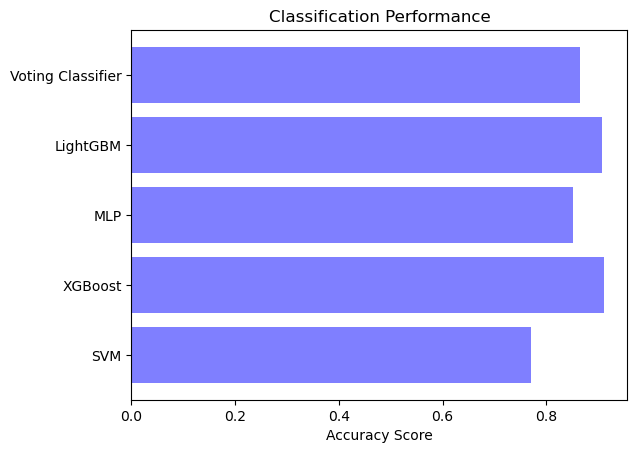

In [78]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

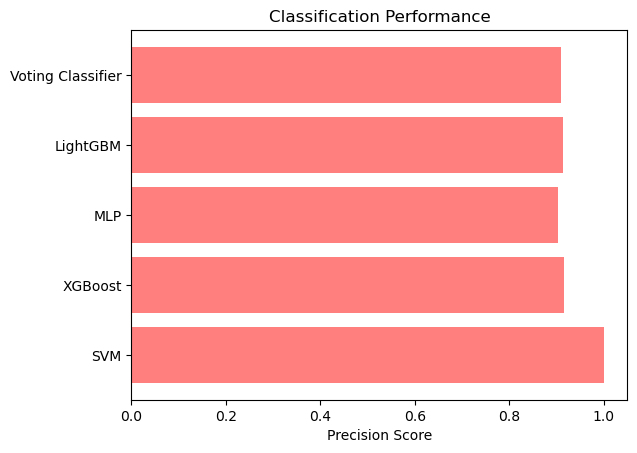

In [79]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

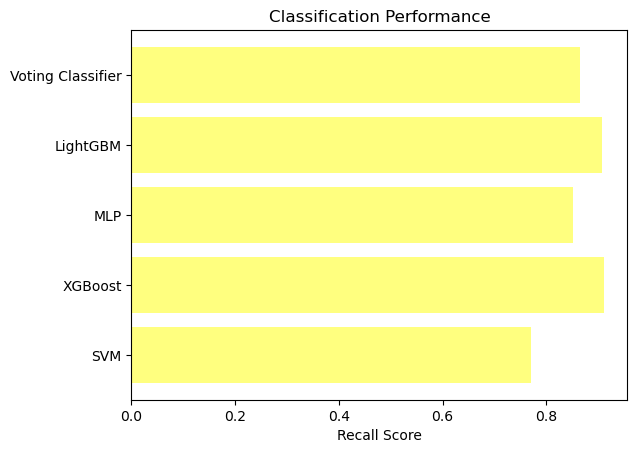

In [80]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

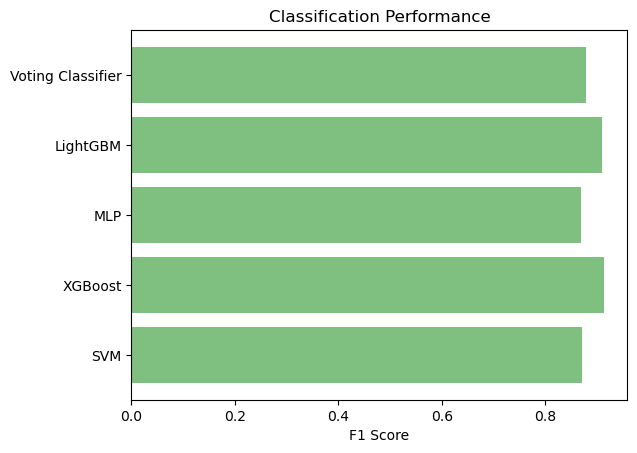

In [81]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Multi Heart Sound

In [82]:
# Feature extraction function
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)  # Load audio
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y).T, axis=0)
    rms = np.mean(librosa.feature.rms(y=y).T, axis=0)

    return np.hstack([mfccs, chroma, mel, zcr, rms])

In [95]:
# Load dataset and extract features
dataset_path = "MultiHeartBeats"

In [96]:
labels = []
features = []

In [97]:
for label in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, label)
    if os.path.isdir(class_path):
        for file in os.listdir(class_path):
            file_path = os.path.join(class_path, file)
            feature_vector = extract_features(file_path)
            features.append(feature_vector)
            labels.append(label)

In [98]:
# Convert to DataFrame
df = pd.DataFrame(features)
df['label'] = labels

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2815 entries, 0 to 2814
Columns: 156 entries, 0 to label
dtypes: float64(155), object(1)
memory usage: 3.4+ MB


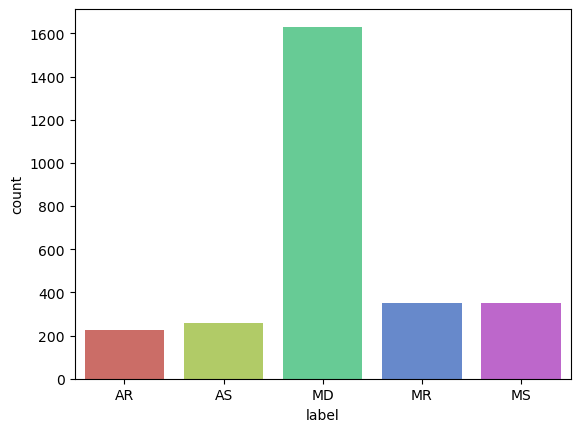

In [100]:
sns.countplot(x='label',data=df, palette='hls')
plt.show()
#plt.savefig('count_plot') mal: the nodule malignancy, 0: benign, 1: malignant

In [101]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [102]:
X = df.drop(columns=['label']).values
y = df['label'].values

In [103]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [104]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# SVM

In [105]:
svc = svm.SVC(probability=True, C=1.0, kernel = "rbf", gamma=0.1)
svc.fit(X_train, y_train)

y_pred    = svc.predict(X_valid)

svc_acc = accuracy_score(y_pred, y_valid)
svc_prec = precision_score(y_pred, y_valid,average='weighted')
svc_f1 = f1_score(y_pred, y_valid,average='weighted')
svc_rec = recall_score(y_pred, y_valid,average='weighted')

In [106]:
storeResults('SVM',svc_acc,svc_prec,svc_rec,svc_f1)

# XGBoost

In [107]:
bo_xgb = XGBClassifier()

bo_xgb.fit(X_train, y_train)

y_pred    = bo_xgb.predict(X_valid)

xgb_acc = accuracy_score(y_pred, y_valid)
xgb_prec = precision_score(y_pred, y_valid,average='weighted')
xgb_f1 = f1_score(y_pred, y_valid,average='weighted')
xgb_rec = recall_score(y_pred, y_valid,average='weighted')

In [108]:
storeResults('XGBoost',xgb_acc,xgb_prec,xgb_rec,xgb_f1)

# MLP

In [109]:
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')
mlp.fit(X_train, y_train)

y_pred    = mlp.predict(X_valid)

mlp_acc = accuracy_score(y_pred, y_valid)
mlp_prec = precision_score(y_pred, y_valid,average='weighted')
mlp_rec = recall_score(y_pred, y_valid,average='weighted')
mlp_f1 = f1_score(y_pred, y_valid,average='weighted')

In [110]:
storeResults('MLP',mlp_acc,mlp_prec,mlp_rec,mlp_f1)

# LightGBM

In [111]:
clf = lgb.LGBMClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_valid)

lgb_acc = accuracy_score(y_pred, y_valid)
lgb_prec = precision_score(y_pred, y_valid,average='weighted')
lgb_f1 = f1_score(y_pred, y_valid,average='weighted')
lgb_rec = recall_score(y_pred, y_valid,average='weighted')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39525
[LightGBM] [Info] Number of data points in the train set: 2252, number of used features: 155
[LightGBM] [Info] Start training from score -2.515567
[LightGBM] [Info] Start training from score -2.446574
[LightGBM] [Info] Start training from score -0.543319
[LightGBM] [Info] Start training from score -2.081219
[LightGBM] [Info] Start training from score -2.063582


In [112]:
storeResults('LightGBM',lgb_acc,lgb_prec,lgb_rec,lgb_f1)

# Voting Classifier

In [113]:
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)

brf =  BaggingClassifier(MLPClassifier(random_state=1, max_iter=300))

ext = VotingClassifier(estimators=[('BoostDT', bdt),('BaggingMLP', brf)], voting='soft')

ext.fit(X_train, y_train)

y_pred = ext.predict(X_valid)

ext_acc = accuracy_score(y_pred, y_valid)
ext_prec = precision_score(y_pred, y_valid,average='weighted')
ext_rec = recall_score(y_pred, y_valid,average='weighted')
ext_f1 = f1_score(y_pred, y_valid,average='weighted')

In [114]:
storeResults('Voting Classifier',ext_acc,ext_prec,ext_rec,ext_f1)

# Comparison

In [115]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score 
                      }) 

In [116]:
result

,ML Model,Accuracy,Precision,Recall,F1_score
0,SVM,0.586,0.989,0.586,0.728
1,XGBoost,0.719,0.851,0.719,0.757
2,MLP,0.508,0.614,0.508,0.551
3,LightGBM,0.726,0.856,0.726,0.759
4,Voting Classifier,0.599,0.799,0.599,0.664


# Modelling

In [119]:
import joblib
filename = 'models/model_multi.sav'
joblib.dump(clf, filename)

['models/model_multi.sav']

In [120]:
joblib.dump(encoder, "models/multi_encoder.pkl")

['models/multi_encoder.pkl']

# Graph

In [121]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

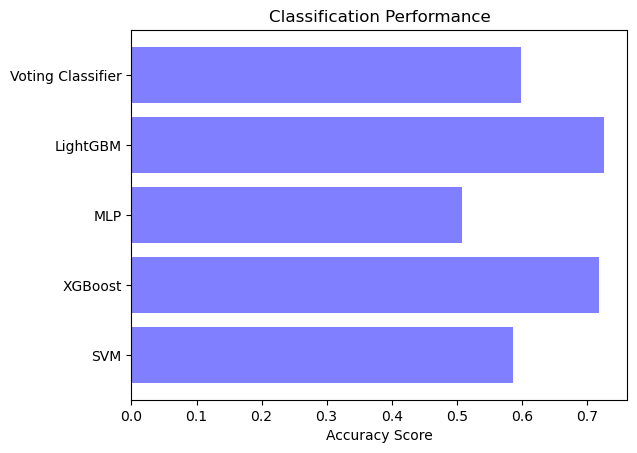

In [122]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

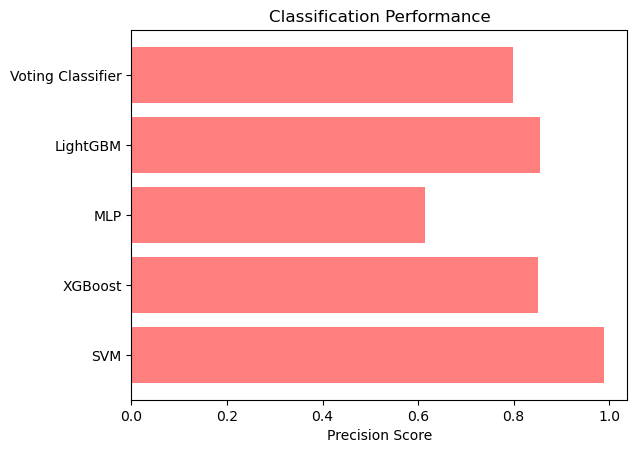

In [123]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

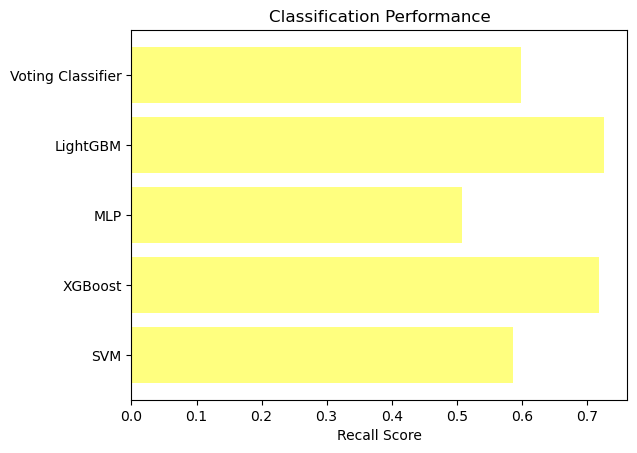

In [124]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

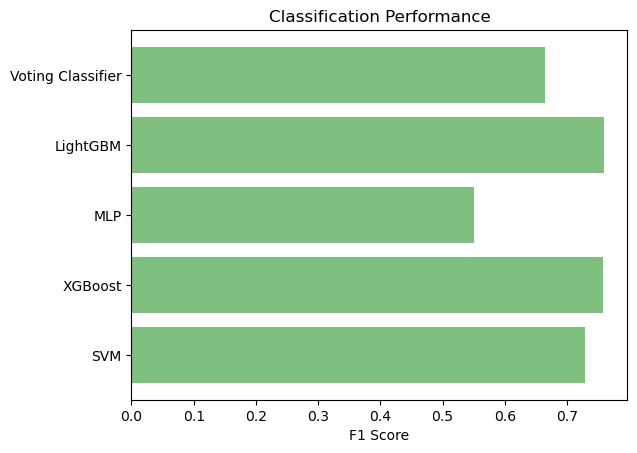

In [125]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

In [166]:
file_path = "C://Users//TruProjects//Desktop//Truprojects//projects//Mar25//heartdisease//Dataset//Other//Other (4).wav"

In [173]:
features = extract_features(file_path)
print(f"Extracted Features Shape: {features.shape}")  # Debugging

Extracted Features Shape: (155,)


In [168]:
model1 = joblib.load("models/model_beats.sav")
model2 = joblib.load("models/model_hs.sav")
model3 = joblib.load("models/model_multi.sav")

In [174]:
features = features.reshape(1, -1)
prediction1 = model1.predict(features)[0]

In [175]:
print(prediction1)

1


In [177]:
if prediction1 == 0:
    prediction2 = model2.predict(features)[0]
    print(prediction2)
    if prediction2 == 0:
        prediction3 = model3.predict(features)[0]
        print(prediction3)
    else:
        print(prediction2)
else:
    print(prediction1)

1
